In [1]:
DATA_DIR = "../data/laks"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("..")

In [4]:
import importlib
import src.laks_data

In [5]:
from src.laks_data import Laks

laks = Laks(DATA_DIR=DATA_DIR)

In [6]:
F = laks.get_cell_fractions()
F

mutation,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [7]:
from src.phylogeny_utils import plot_spectral_clustering

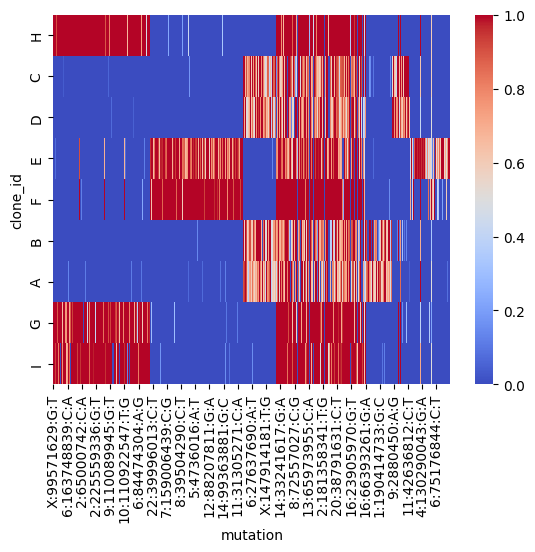

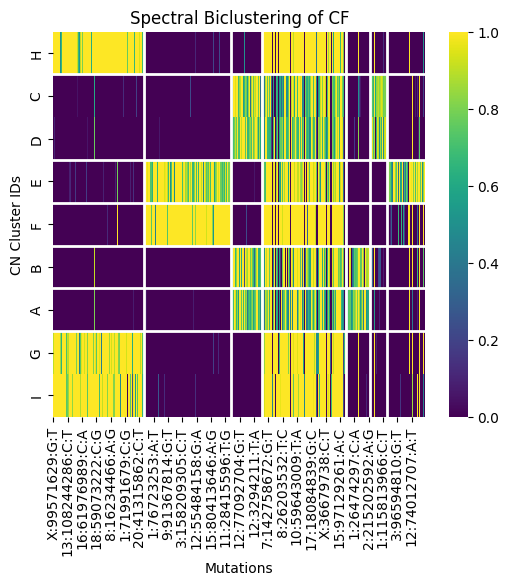

In [8]:
plot_spectral_clustering(F)

# K-means Clustering

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


ranges = range(9, 25, 1)
runs_per_k = 10

X = F.T.to_numpy()

silhouette_scores = []
all_labels = []


for k in ranges:
    print(k)
    for i in range(runs_per_k):
        kmeans = KMeans(n_clusters=k, random_state=i * 100)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        all_labels.append(labels)

9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [10]:
sillhouettes_scores_per_k = np.array(silhouette_scores).reshape((len(ranges), runs_per_k))
best_silhouettes_for_k = np.min(sillhouettes_scores_per_k, axis=1)
best_silhouettes_for_k

array([0.6058519 , 0.58074426, 0.55583069, 0.53371578, 0.53737277,
       0.53590316, 0.52730148, 0.50650198, 0.48775419, 0.49038852,
       0.48708835, 0.46645345, 0.45835115, 0.45980624, 0.4621977 ,
       0.44731976])

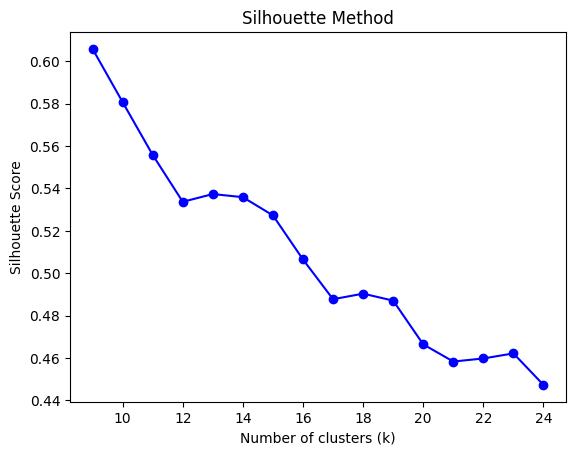

In [11]:
import matplotlib.pyplot as plt

plt.plot(ranges, best_silhouettes_for_k, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [12]:
best_k = 12

ranges = np.array(ranges)

index_of_best_k = int(np.where(ranges == best_k)[0][0])

silhouette_scores_of_best_k = sillhouettes_scores_per_k[index_of_best_k, :]

best_label_index_of_best_best = np.argmin(silhouette_scores_of_best_k)

labels_per_k = np.array(all_labels).reshape((len(ranges), runs_per_k, -1))

best_labels = labels_per_k[index_of_best_k, best_label_index_of_best_best]

In [13]:
import pandas as pd

kmeans_labels = pd.DataFrame({
    'mutation': F.columns.to_list(),
    'clone': best_labels
})
kmeans_labels

,mutation,clone
0,10:100129846:C:A,1
1,10:100185101:A:G,1
2,10:100209326:T:C,2
3,10:100283942:C:T,9
4,10:10086005:G:T,7
...,...,...
14063,X:98278474:C:A,0
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,1


In [14]:
kmeans_labels.groupby("clone")["mutation"].count()

clone
0      310
1     2406
2     1788
3     1186
4     1400
5      640
6     3133
7      685
8     1126
9      953
10     248
11     193
Name: mutation, dtype: int64

In [15]:
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"
df_phertilizer_mutations = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/SNV_clusters.csv")
df_phertilizer_mutations["mutation"] = df_phertilizer_mutations["mutation"].str.split("_").str[1]
df_phertilizer_mutations.rename(columns={"cluster": "phertilizer_clone"}, inplace=True)
df_phertilizer_mutations

,phertilizer_clone,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [16]:
merged = pd.merge(kmeans_labels, df_phertilizer_mutations, on='mutation', how='left')
merged["phertilizer_clone"] = merged["phertilizer_clone"].fillna(-1).astype(int)
merged["clone"] = (merged["clone"]).fillna(-1).astype(int)
merged

,mutation,clone,phertilizer_clone
0,10:100129846:C:A,1,7
1,10:100185101:A:G,1,7
2,10:100209326:T:C,2,0
3,10:100283942:C:T,9,7
4,10:10086005:G:T,7,5
...,...,...,...
14063,X:98278474:C:A,0,2
14064,X:98452192:T:C,5,4
14065,X:98700894:C:T,2,0
14066,X:99136386:C:T,1,7


In [17]:
merged["clone"].unique()

array([ 1,  2,  9,  7,  4,  5, 11,  6,  3,  0,  8, 10])

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(merged["clone"], merged["phertilizer_clone"])

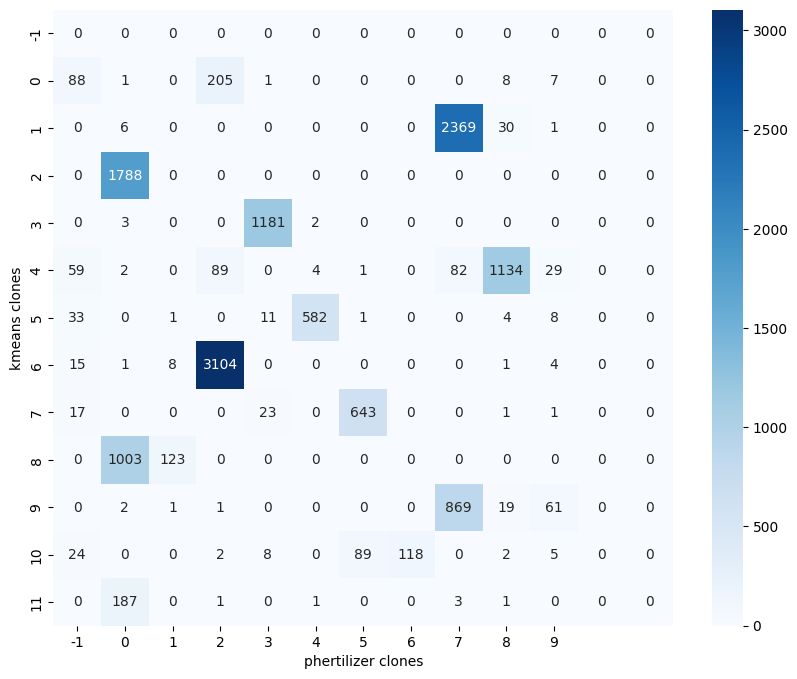

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

y_labels = [-1] + sorted(merged["clone"].unique())
x_labels = sorted(merged["phertilizer_clone"].unique())

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt="d", xticklabels=x_labels, yticklabels=y_labels, cmap="Blues")
plt.ylabel("kmeans clones")
plt.xlabel("phertilizer clones")
plt.show()


['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/576708756.py:44: 

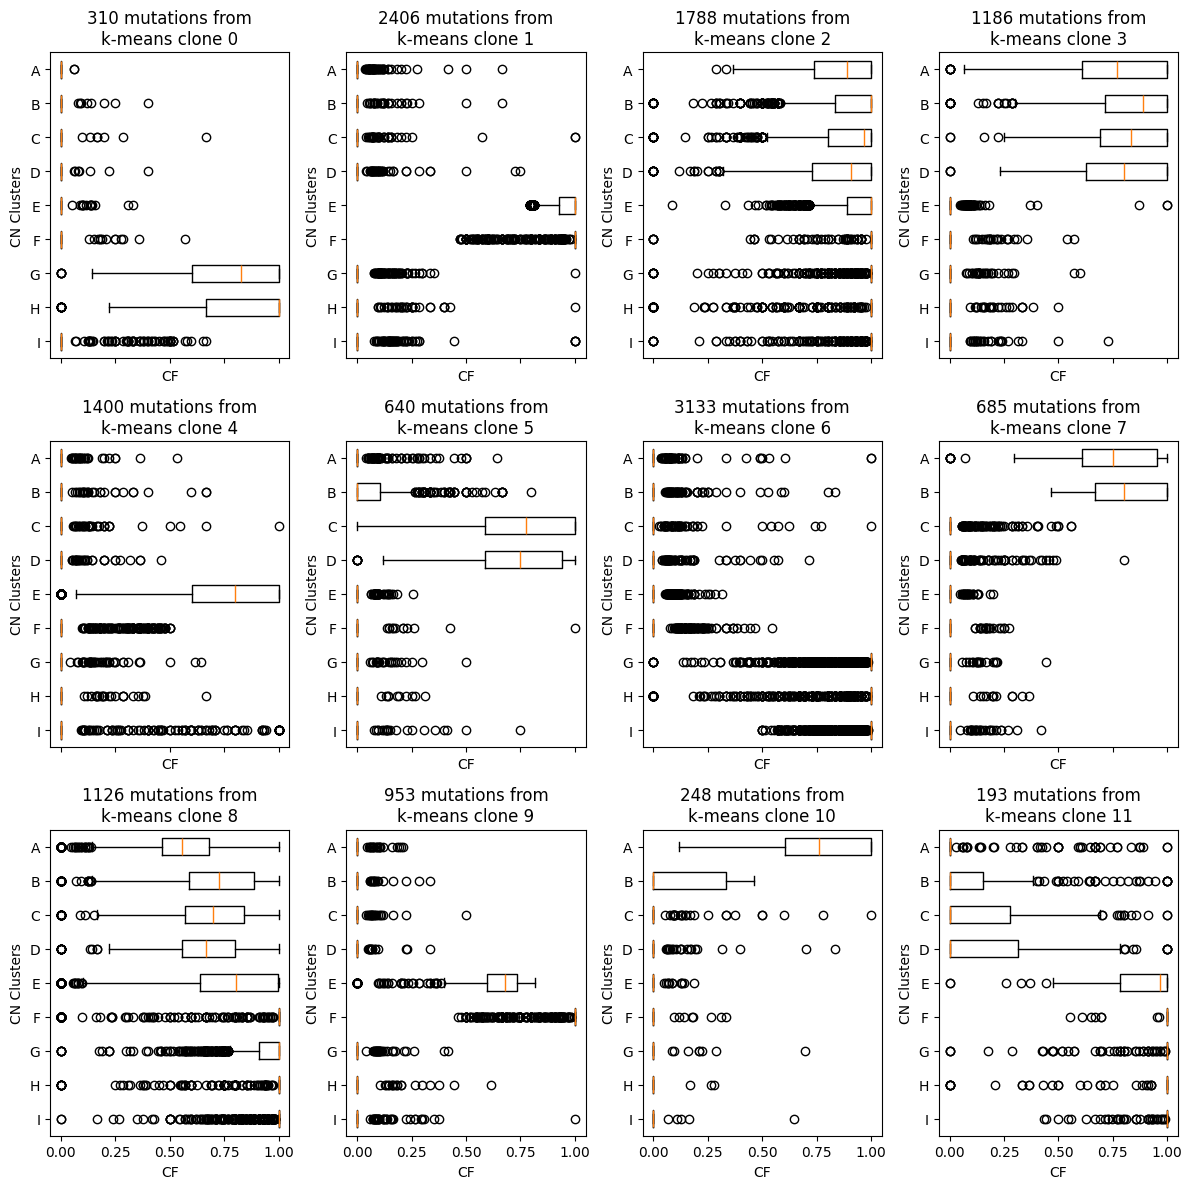

In [20]:
import matplotlib.pyplot as plt
import numpy as np

clusters = sorted(merged["clone"].unique())
n_clusters = len(clusters)

# Set up subplot grid: 2 columns
n_cols = 4
n_rows = (n_clusters + 2) // n_cols

fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols,
    figsize=(12, 4 * n_rows),
    sharex=True
)

axes = axes.flatten()

# Define explicit CN cluster order
cn_order = sorted(F.index.unique())[::-1]  # or use a fixed list if known: ['A','B','C','D','E','F','G','H','I']
print(cn_order)

for i, cluster in enumerate(clusters):
    ax = axes[i]

    # Get mutations for this cluster
    mutations_in_cluster = merged[
        merged["clone"] == cluster
    ]["mutation"]

    df = F[mutations_in_cluster]

    # Ensure consistent y-axis order (A→I)
    df = df.loc[cn_order]

    F_clust = df.to_numpy()

    thres = 0.75
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100 * thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100 * (1 - thres)))

    # Horizontal boxplot per clone, sorted A→I
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel("CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from\nk-means clone {cluster}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

[0.         0.         0.         0.         0.         0.
 0.82843137 1.         0.        ]
[0.        0.        0.        0.        0.        0.        1.
 1.        0.4825784]
[0.         0.         0.         0.         0.         0.
 0.24191176 0.24345238 0.        ]
[0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0.         0.         0.         0.         0.81679035 0.85837438
 0.         0.         0.        ]
[0.88888889 1.         0.96774194 0.90909091 1.         1.
 1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.57142857 0.57142857 0.57142857 0.51282051 0.68965517 1.
 0.80571429 0.72727273 0.86956522]
[0.76923077 0.88888889 0.83333333 0.8        0.         0.
 0.         0.         0.        ]
[1.         1.         1.         1.         0.06573555 0.
 0.         0.         0.        ]
[0.44444444 0.48402019 0.5        0.47619048 0.         0.
 0.         0.         0.        ]
[0.  0.  0.  0.  0.8 0.  0.  0.  0. ]
[0.         0.         0.    

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/117068686.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/117068686.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/117068686.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.T.values, vert=False, labels=df.index)
/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_93863/117068686.py:39: 

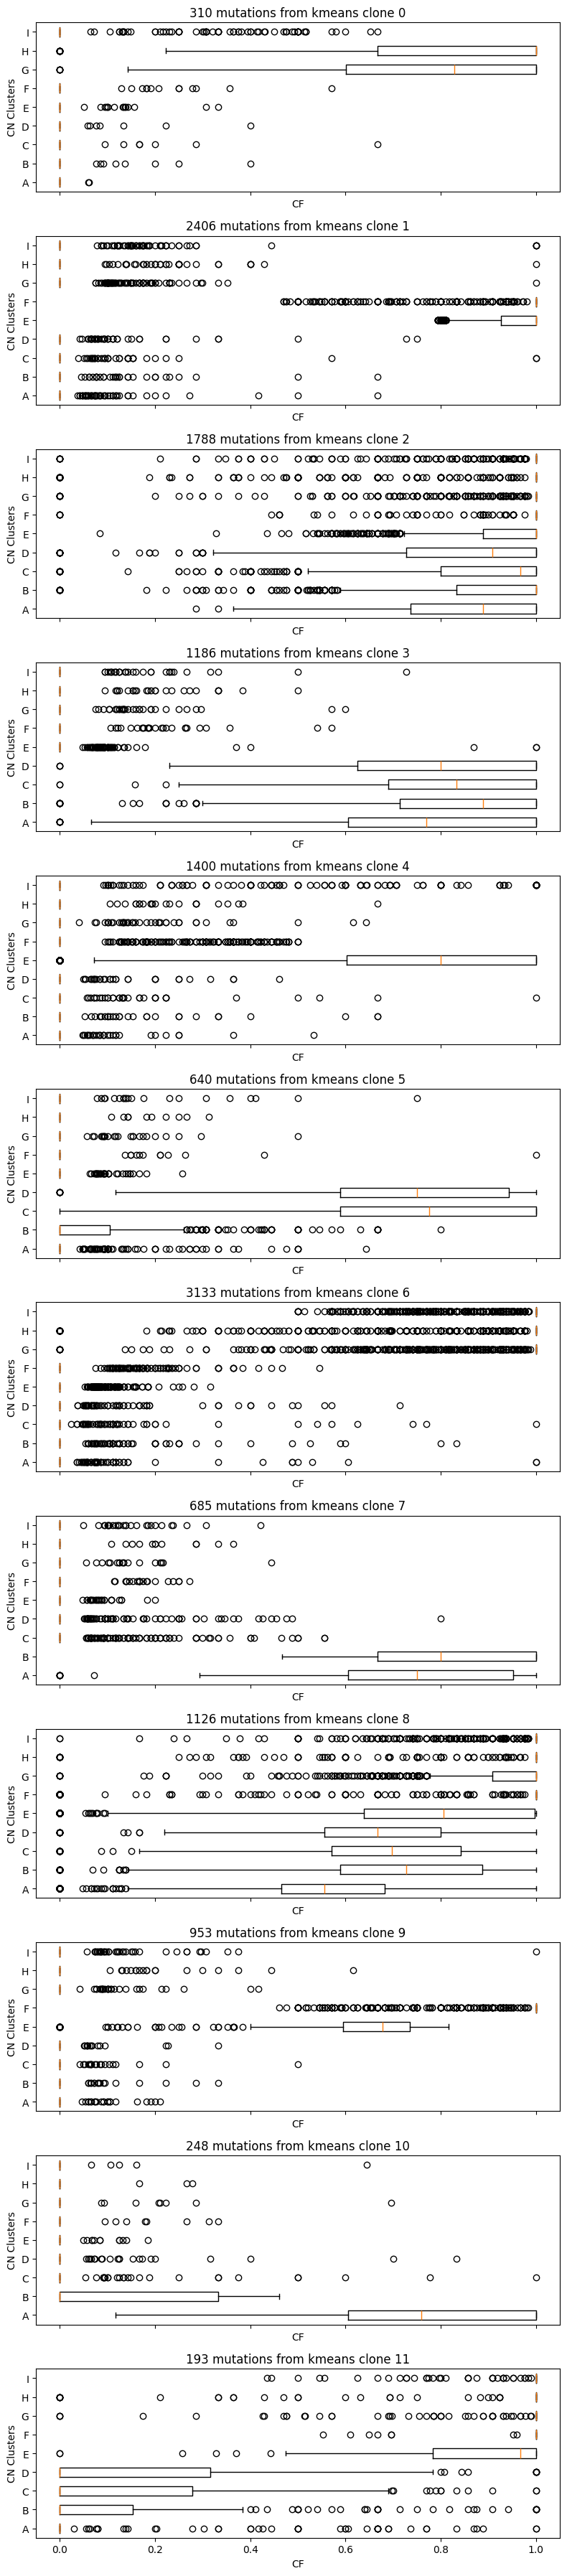

In [21]:
import matplotlib.pyplot as plt

clones = sorted(kmeans_labels["clone"].unique())
n_clones = len(clones)

fig, axes = plt.subplots(nrows=n_clones, figsize=(8, 3*n_clones), sharex=True)

# If only one cluster, axes might not be a list
if n_clones == 1:
    axes = [axes]


medians = []
upper_percentiless = []
lower_percentiless = []

for ax, clone in zip(axes, clones):
    # Get mutations for this cluster
    mutations_in_cluster = kmeans_labels[kmeans_labels["clone"] == clone]["mutation"]

    df = F[mutations_in_cluster]

    F_clust = df.to_numpy()

    thres = 0.95
    median = np.median(F_clust, axis=1)
    upper_percentiles = np.percentile(F_clust, axis=1, q=int(100*thres))
    lower_percentiles = np.percentile(F_clust, axis=1, q=int(100*(1-thres)))

    print(median)
    print(upper_percentiles)
    print(lower_percentiles)

    medians.append(median)
    upper_percentiless.append(upper_percentiles)
    lower_percentiless.append(lower_percentiles)

    # Horizontal boxplot per clone
    ax.boxplot(df.T.values, vert=False, labels=df.index)

    ax.set_ylabel(f"CN Clusters")
    ax.set_xlabel("CF")
    ax.set_title(f"{df.shape[1]} mutations from kmeans clone {clone}")

plt.tight_layout()
plt.show()


In [22]:
medians = np.vstack(medians).T
upper_percentiless = np.vstack(upper_percentiless).T
lower_percentiless = np.vstack(lower_percentiless).T

In [23]:
F_bar = pd.DataFrame(medians, index=F.index)
F_bar

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.000000,0.0,0.888889,0.769231,0.0,0.00000,0.0,0.75,0.555556,0.000000,0.759615,0.000000
B,0.000000,0.0,1.000000,0.888889,0.0,0.00000,0.0,0.80,0.727273,0.000000,0.000000,0.000000
C,0.000000,0.0,0.967742,0.833333,0.0,0.77592,0.0,0.00,0.696663,0.000000,0.000000,0.000000
D,0.000000,0.0,0.909091,0.800000,0.0,0.75000,0.0,0.00,0.666667,0.000000,0.000000,0.000000
E,0.000000,1.0,1.000000,0.000000,0.8,0.00000,0.0,0.00,0.806452,0.677966,0.000000,0.967742
F,0.000000,1.0,1.000000,0.000000,0.0,0.00000,0.0,0.00,1.000000,1.000000,0.000000,1.000000
G,0.828431,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000
H,1.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000
I,0.000000,0.0,1.000000,0.000000,0.0,0.00000,1.0,0.00,1.000000,0.000000,0.000000,1.000000


In [24]:
F_hi = pd.DataFrame(upper_percentiless, index=F.index)
F_hi

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.000000,0.0,1.0,1.000000,0.000000,0.112007,0.0,1.000000,1.0,0.00000,1.000000,0.689655
B,0.000000,0.0,1.0,1.000000,0.000000,0.348082,0.0,1.000000,1.0,0.00000,0.428571,0.833766
C,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.0,0.181818,1.0,0.00000,0.139524,0.727692
D,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.0,0.130196,1.0,0.00000,0.099303,0.774582
E,0.000000,1.0,1.0,0.065736,1.000000,0.075816,0.0,0.000000,1.0,0.78125,0.000000,1.000000
F,0.000000,1.0,1.0,0.000000,0.333333,0.000000,0.0,0.000000,1.0,1.00000,0.000000,1.000000
G,1.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.00000,0.000000,1.000000
H,1.000000,0.0,1.0,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.00000,0.000000,1.000000
I,0.482578,0.0,1.0,0.000000,0.461538,0.000000,1.0,0.000000,1.0,0.00000,0.000000,1.000000


In [25]:
F_lo = pd.DataFrame(lower_percentiless, index=F.index)
F_lo

,0,1,2,3,4,5,6,7,8,9,10,11
clone_id,,,,,,,,,,,,
A,0.000000,0.000000,0.571429,0.444444,0.0,0.000000,0.000000,0.434783,0.000000,0.000000,0.416667,0.000000
B,0.000000,0.000000,0.571429,0.484020,0.0,0.000000,0.000000,0.526316,0.200000,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.571429,0.500000,0.0,0.090909,0.000000,0.000000,0.338235,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.512821,0.476190,0.0,0.333333,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000
E,0.000000,0.816790,0.689655,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.137888,0.000000,0.572872
F,0.000000,0.858374,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.644240,0.000000,1.000000
G,0.241912,0.000000,0.805714,0.000000,0.0,0.000000,0.705882,0.000000,0.655738,0.000000,0.000000,0.499048
H,0.243452,0.000000,0.727273,0.000000,0.0,0.000000,0.727273,0.000000,0.758345,0.000000,0.000000,0.363636
I,0.000000,0.000000,0.869565,0.000000,0.0,0.000000,0.782065,0.000000,0.740741,0.000000,0.000000,0.727273


In [26]:
cluster_weights = merged.groupby("clone").size().tolist()
cluster_weights

[310, 2406, 1788, 1186, 1400, 640, 3133, 685, 1126, 953, 248, 193]

In [27]:
import importlib
import src.solve_ilp
import src.phylogeny_utils

importlib.reload(src.solve_ilp)
importlib.reload(src.phylogeny_utils)

<module 'src.phylogeny_utils' from '/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py'>

In [28]:
from src.solve_ilp import solve_cncff

solutions = solve_cncff(F_hi, F_lo, len(F_hi.columns), n_solutions=5000, cluster_weights=cluster_weights)

Set parameter WLSAccessID


Set parameter WLSSecret
Set parameter LicenseID to value 2687964
Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Set parameter TimeLimit to value 600
Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 5000
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[arm] - Darwin 24.6.0 24G90)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  600
PoolSolutions  5000
PoolSearchMode  2

Academic license 2687964 - for non-commercial use only - registered to sa___@iict.buet.ac.bd
Optimize a model with 12003 rows, 2172 columns and 33953 nonzeros
Model fingerprint: 0x6facab22
Variable types: 1512 continuous, 660 integer (660 binary)
Coefficient statistics:
  Matrix range     [7e-02, 2e+01]
  Objective range  [2e+02, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective -0.0000000
Presol

In [29]:
len(solutions)

5000

In [92]:
from src.phylogeny_utils import generate_perfect_phylogeny, fix_T, draw_clone_tree, add_clusters_to_clonal_T

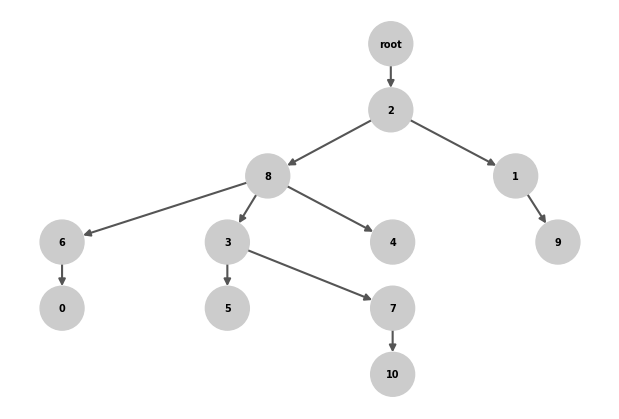

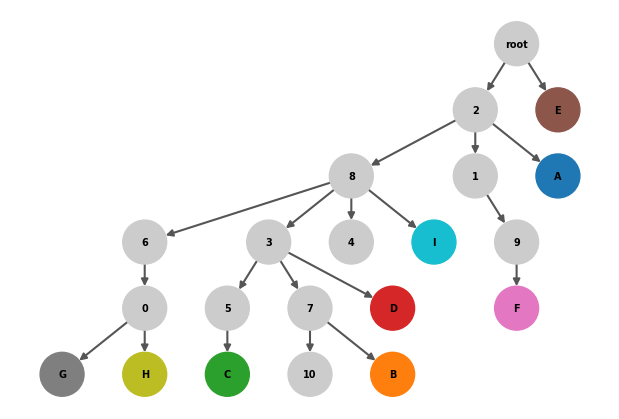

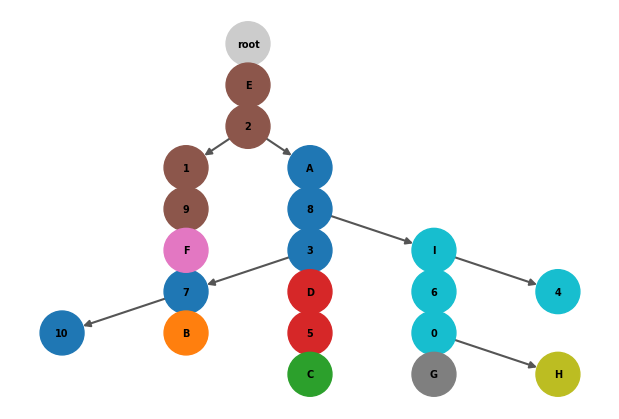

B [2, 3, 7, 8] 7
C [2, 3, 5, 8] 5
F [1, 2, 9] 9
G [0, 2, 6, 8] 0
H [0, 2, 6, 8] 0


/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


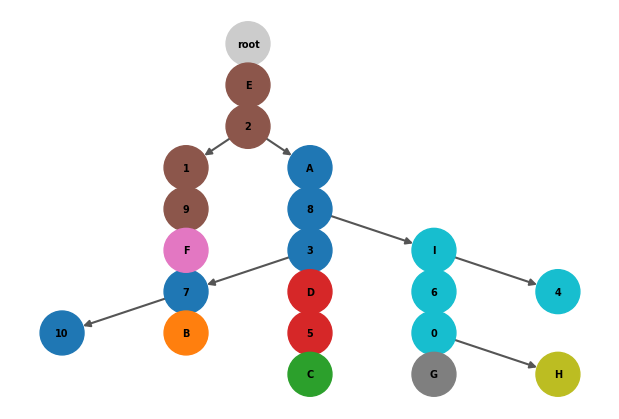

In [93]:
X, B, U, F, G = solutions[0]
# print(X[X>0.5].dropna().index.tolist())
solT_mut, solT_cell = generate_perfect_phylogeny(B)
draw_clone_tree(solT_mut)
draw_clone_tree(solT_cell)
fixed_T = fix_T(B, G, solT_cell)
draw_clone_tree(fixed_T)
appended_T = add_clusters_to_clonal_T(solT_mut, X, G, B)
draw_clone_tree(appended_T)


0
[1, 'A']


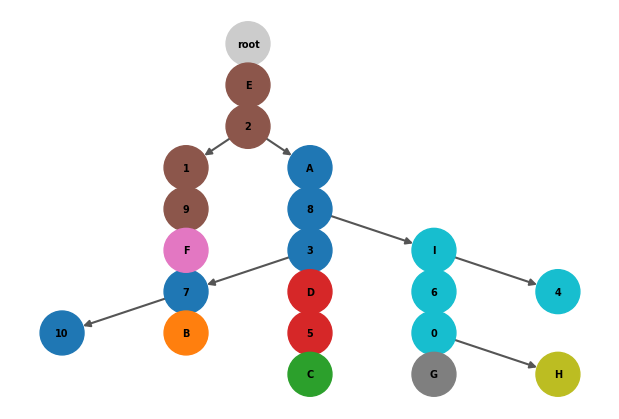

1
[1, 'A']


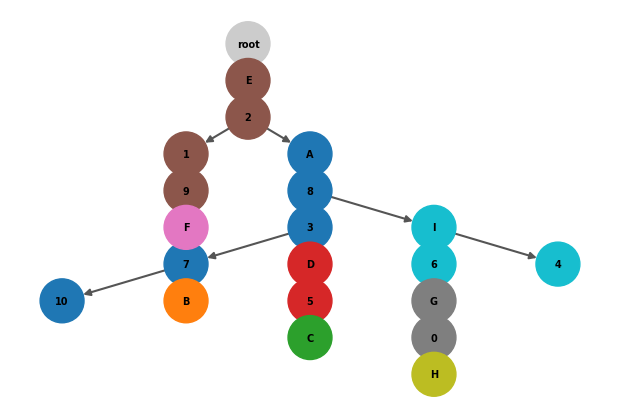

2
[1, 'A']


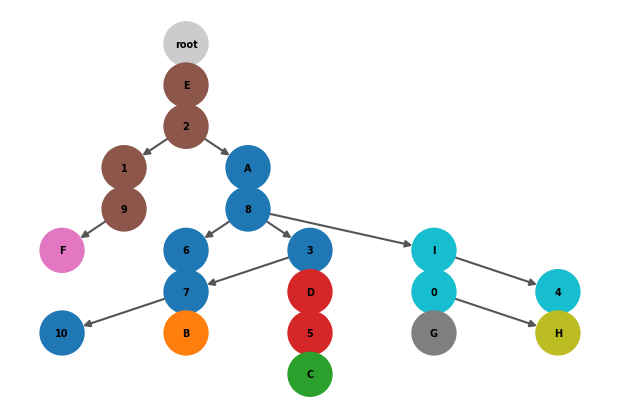

3
0 is being repeated
4
[1, 'A']


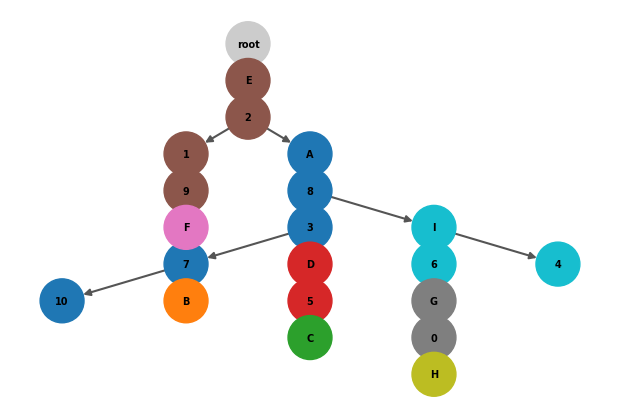

5
[1, 'A']
6
[1, 'A']
7
[1, 'A']
8
[1, 'A']
9
[1, 'A']
10
[1, 'A']
11
[1, 'A']
12
[1, 'A']
13
[1, 'A']
14
[1, 'A']
15
[1, 'A']
16
[1, 'A']
17
[1, 'A']
18
['A', 'E']
19
[8, 'E']
20
[8, 'E']
21
[8, 'E']
22
[8, 'E']
23
[8, 'E']
24
[8, 'E']
25
[8, 'E']
26
[8, 'E']
27
[1, 'A']
28
[1, 'A']
29
[1, 'A']
30
[1, 'A']
31
[1, 'A']
32
[1, 'A']
33
[1, 'A']
34
[1, 'A']
35
[8, 1]
36
[1, 'A']
37
[1, 'A']
38
[1, 'A']
39
[1, 'A']
40
[1, 'A']
41
[1, 'A']
42
['A', 'E']
43
[1, 'A']
44
[1, 'A']
45
[1, 'A']
46
['A', 'E']
47
[1, 'A']
48
[1, 'A']
49
[1, 'A']
50
[1, 'A']
51
[1, 'A']
52
[8, 'E']
53
[8, 'E']
54
[8, 'E']
55
[8, 'E']
56
[8, 'E']
57
[8, 'E']
58
[8, 'E']
59
[8, 'E']
60
[1, 'A']
61
8 is being repeated
62
[1, 'A']
63
[1, 'A']
64
[1, 'A']
65
[1, 'A']
66
[1, 'A']
67
[1, 'A']
68
[1, 'A']
69
[8, 1]
70
[8, 1]
71
[8, 1]
72
[8, 1]
73
[8, 1]
74
[1, 'A']
75
[1, 'A']
76
[1, 'A']
77
[1, 'A']
78
[1, 'A']
79
[8, 1]
80
[8, 1]
81
[1, 'A']
82
[1, 'A']
83
[1, 'A']
84
[1, 'A']
85
[1, 'A']
86
[1, 'A']
87
[1, 'A']
88
[1, '

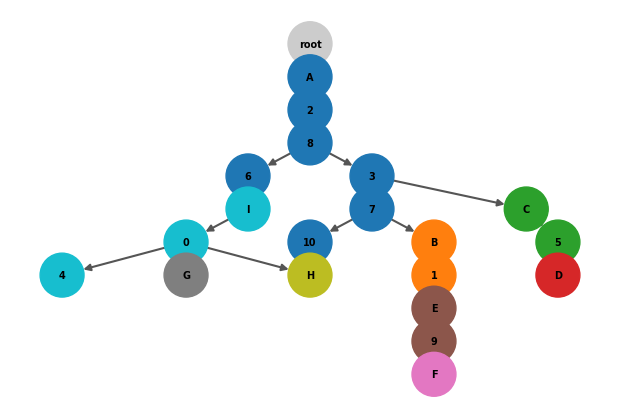

530
[8]


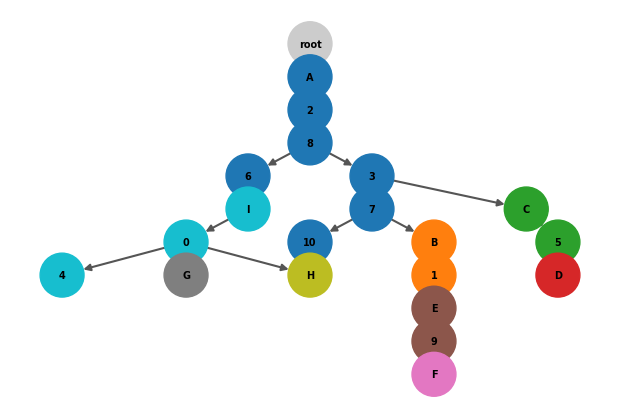

531
[8, 1]
532
[8, 1]
533
[8]


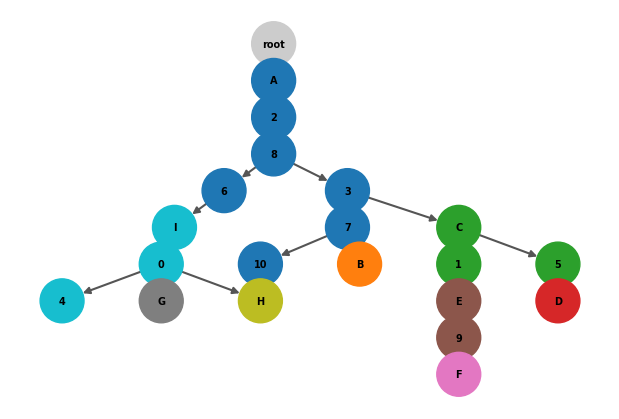

534
[8]


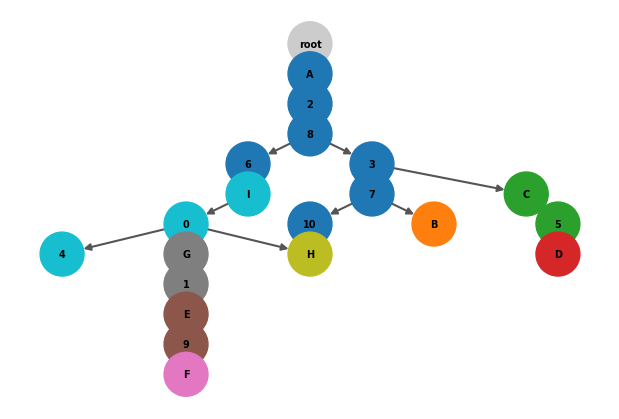

535
[8, 1]
536
[8]


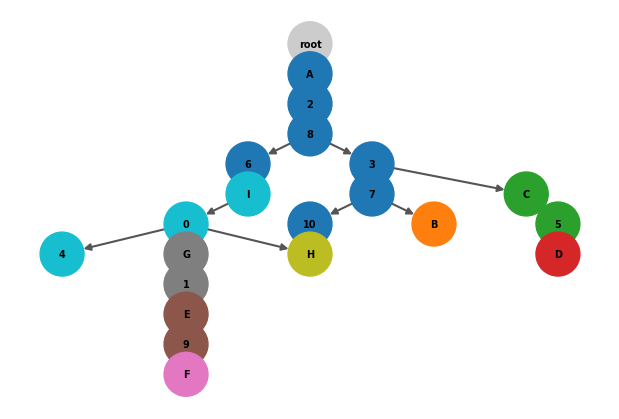

537
[8]


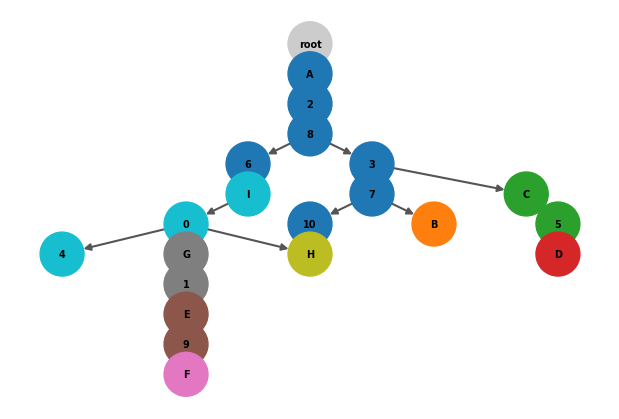

538
[8]


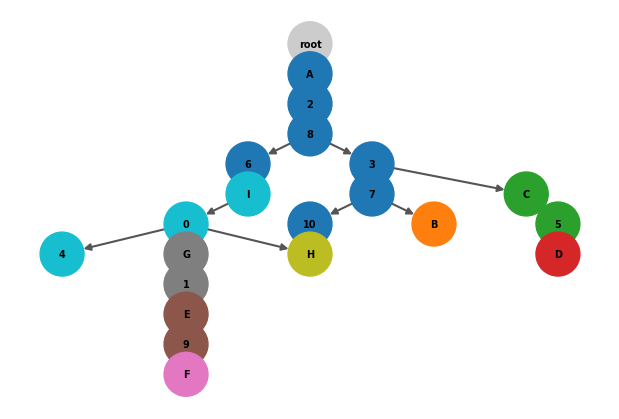

539
[8]


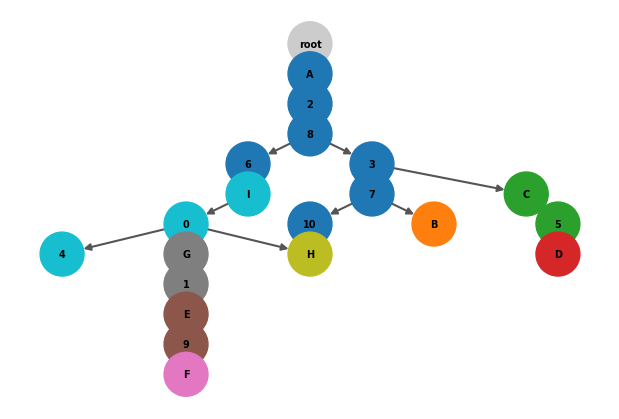

540
[8]


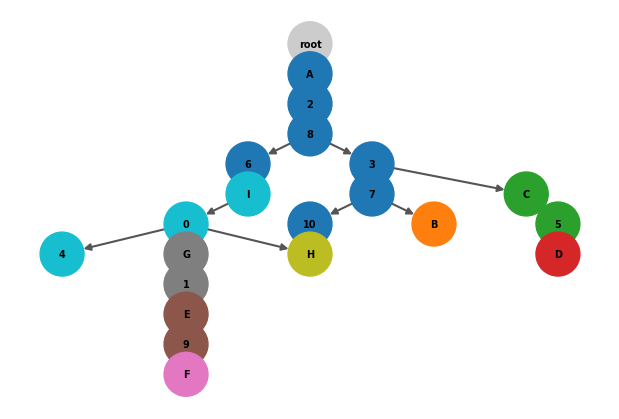

541
[8]


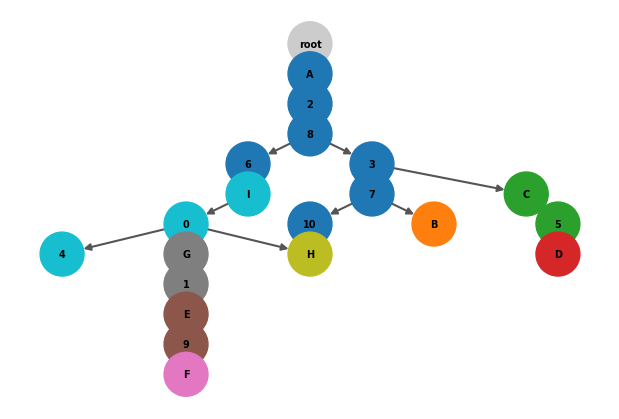

542
[8]


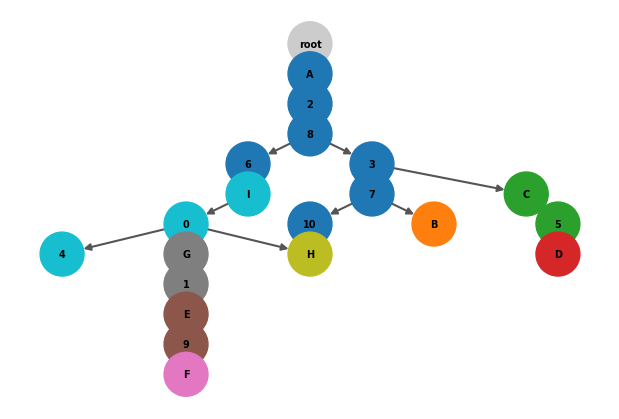

543
[8]


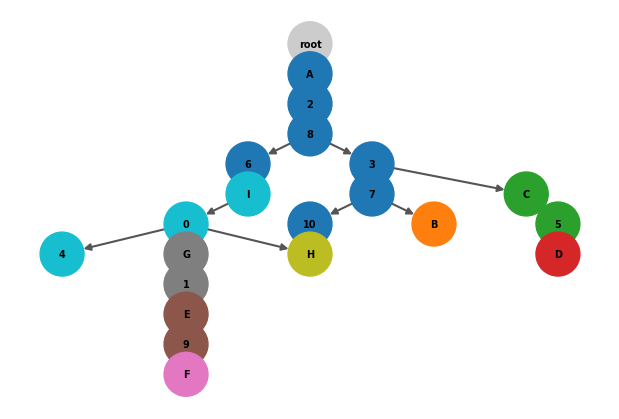

544
[8]


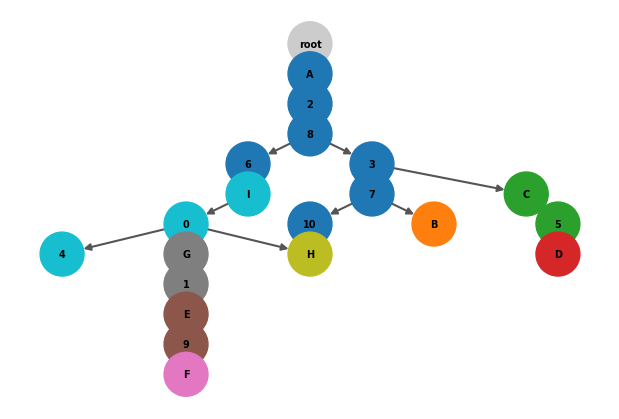

545
[8]


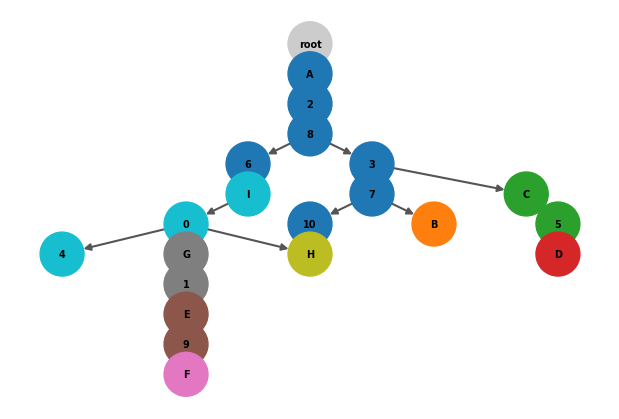

546
[8]


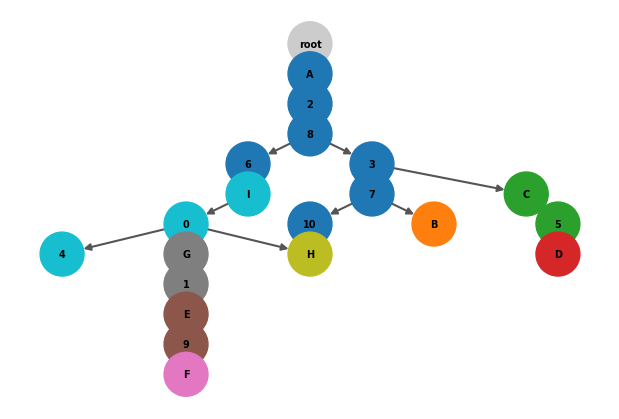

547
[1, 'A']
548
[1, 'A']
549
[1, 'A']
550
[1, 'A']
551
[1, 'A']
552
[1, 'A']
553
[1, 'A']
554
[1, 'A']
555
[1, 'A']
556
[1, 'A']
557
[1, 'A']
558
[1, 'A']
559
[1, 'A']
560
[1, 'A']
561
['A', 'E']
562
['A', 'E']
563
['A', 'E']
564
['A', 'E']
565
['A', 'E']
566
7 is being repeated
567
7 is being repeated
568
7 is being repeated
569
7 is being repeated
570
7 is being repeated
571
7 is being repeated
572
7 is being repeated
573
7 is being repeated
574
7 is being repeated
575
7 is being repeated
576
7 is being repeated
577
7 is being repeated
578
7 is being repeated
579
7 is being repeated
580
7 is being repeated
581
7 is being repeated
582
7 is being repeated
583
7 is being repeated
584
7 is being repeated
585
7 is being repeated
586
7 is being repeated
587
[8, 1]
588
[8, 1]
589
[8, 1]
590
[8, 1]
591
[8, 1]
592
[8, 1]
593
[8, 1]
594
[8, 1]
595
[8, 1]
596
[8, 1]
597
[8, 1]
598
7 is being repeated
599
7 is being repeated
600
7 is being repeated
601
7 is being repeated
602
7 is being repeate

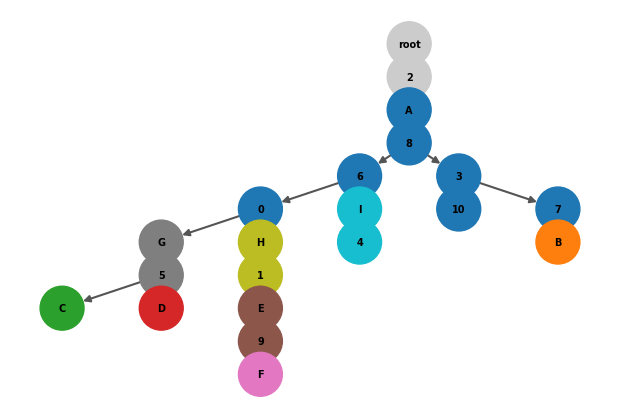

665
['A']


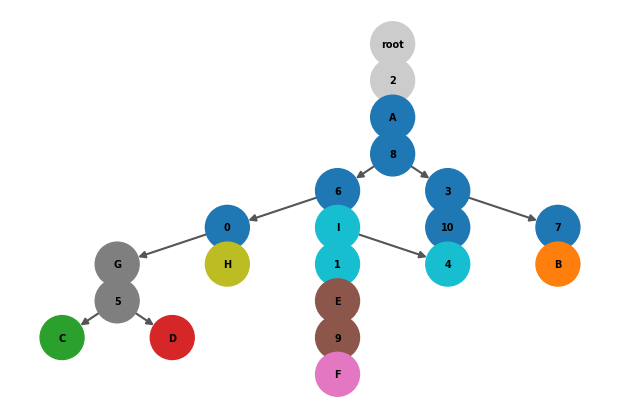

666
['A']


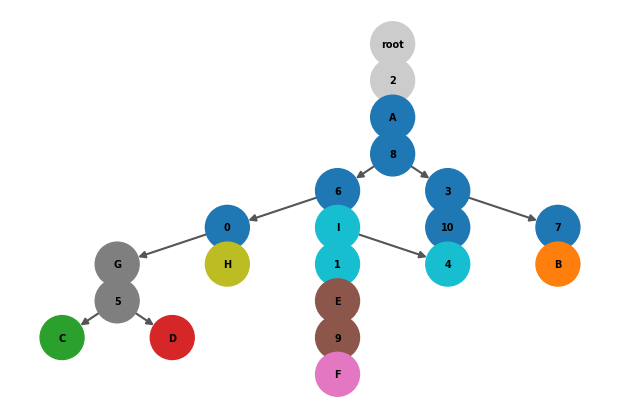

667
['A']


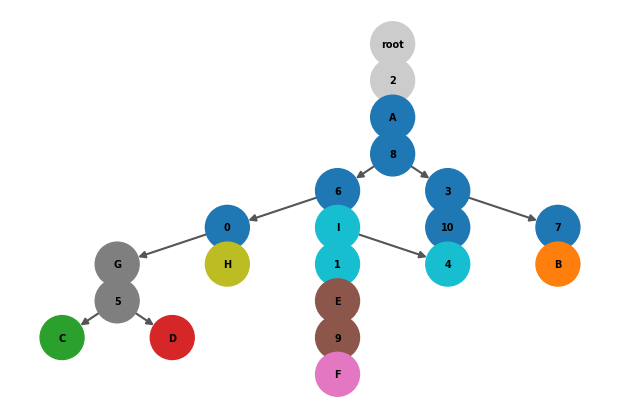

668
7 is being repeated
669
7 is being repeated
670
7 is being repeated
671
7 is being repeated
672
7 is being repeated
673
7 is being repeated
674
7 is being repeated
675
7 is being repeated
676
7 is being repeated
677
7 is being repeated
678
7 is being repeated
679
7 is being repeated
680
7 is being repeated
681
7 is being repeated
682
7 is being repeated
683
7 is being repeated
684
7 is being repeated
685
7 is being repeated
686
7 is being repeated
687
7 is being repeated
688
7 is being repeated
689
7 is being repeated
690
7 is being repeated
691
7 is being repeated
692
7 is being repeated
693
7 is being repeated
694
7 is being repeated
695
7 is being repeated
696
7 is being repeated
697
7 is being repeated
698
7 is being repeated
699
7 is being repeated
700
7 is being repeated
701
7 is being repeated
702
7 is being repeated
703
7 is being repeated
704
7 is being repeated
705
7 is being repeated
706
7 is being repeated
707
[1, 'A']
708
[1, 'A']
709
[1, 'A']
710
[1, 'A']
711
[1, 'A']

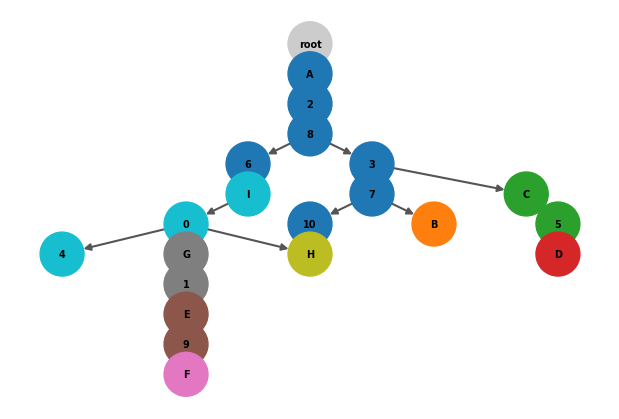

806
[8]


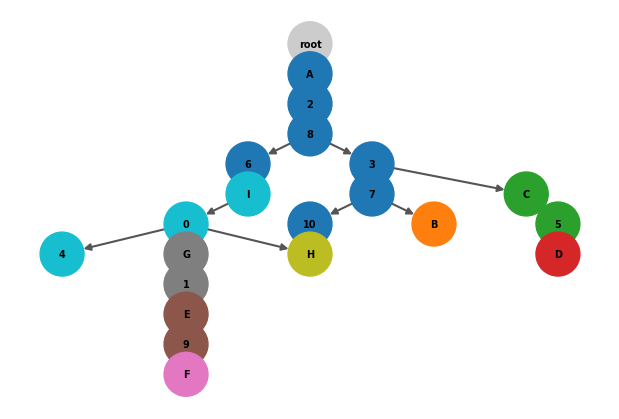

807
[8]


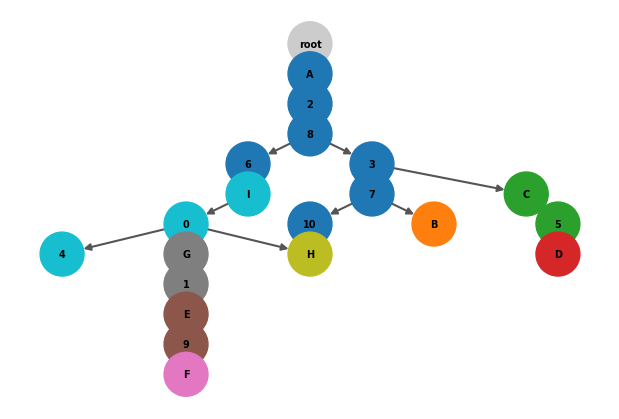

808
[8]


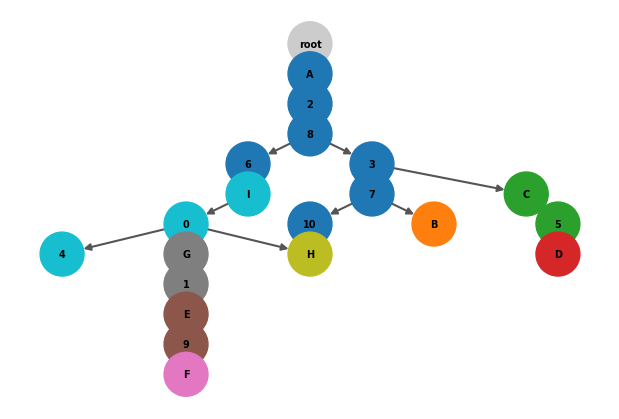

809
[8]


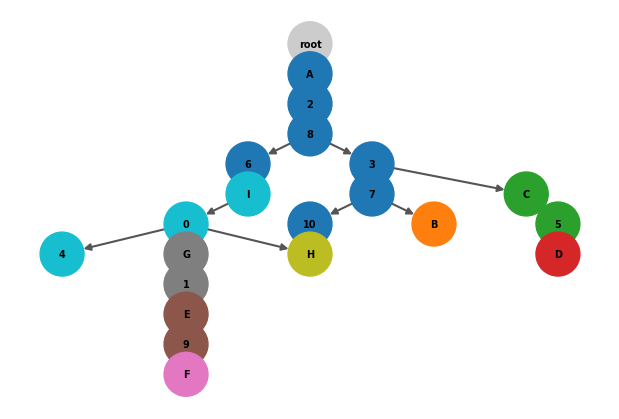

810
[8]


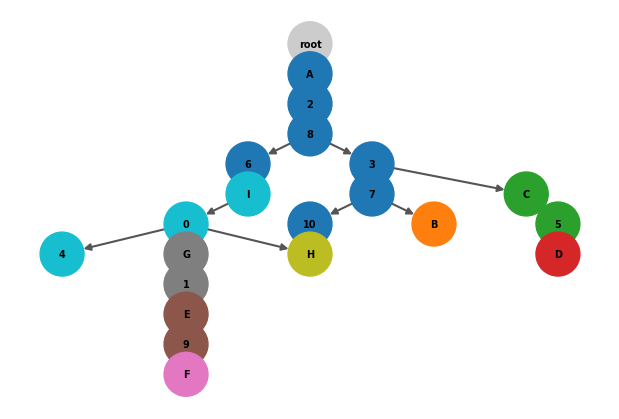

811
[8]


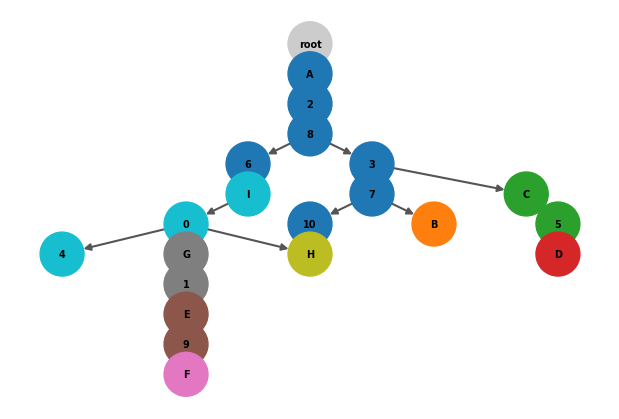

812
[8]


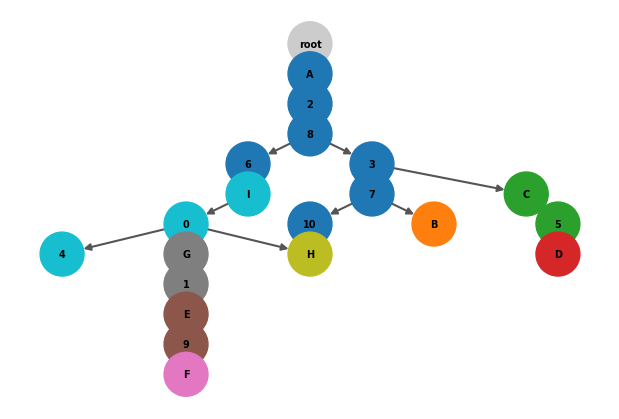

813
[8]


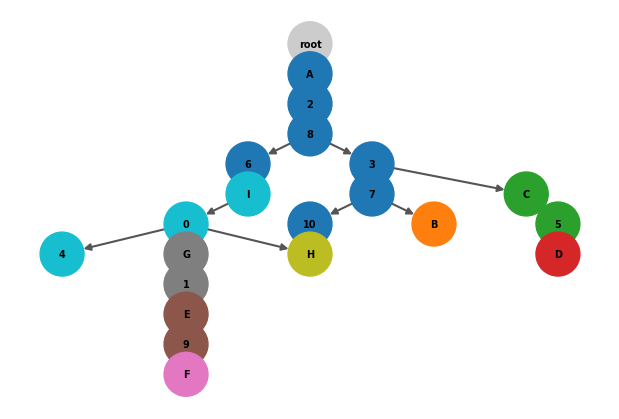

814
[8]


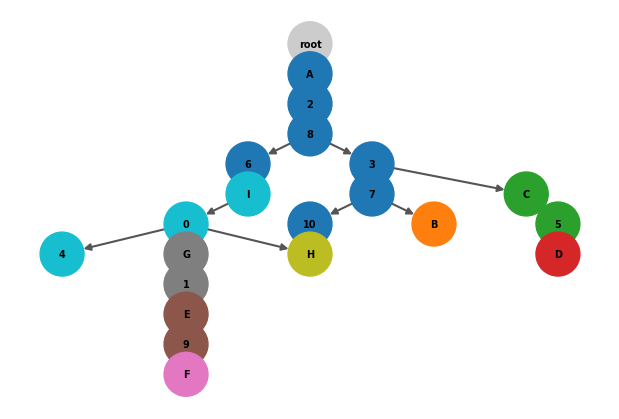

815
[8]


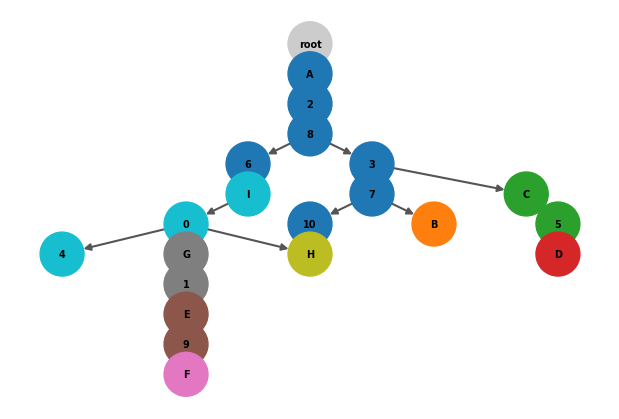

816
[8]


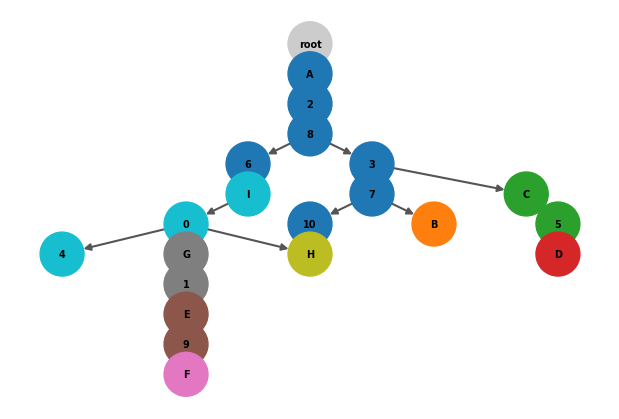

817
[8]


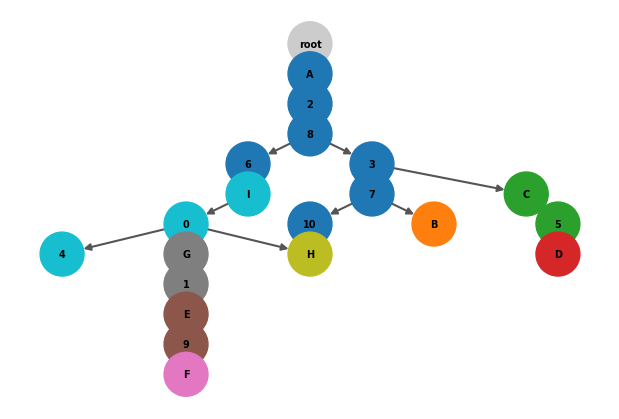

818
[8]


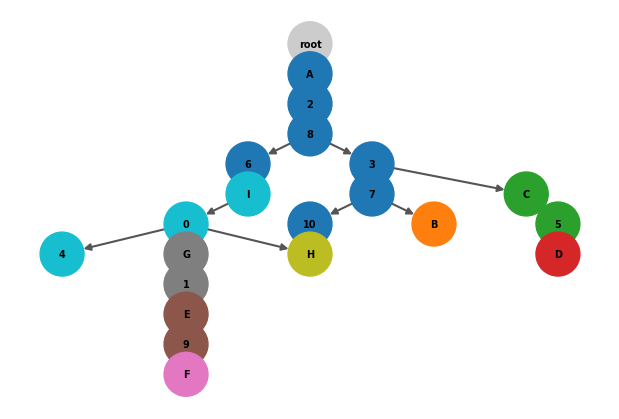

819
[8]


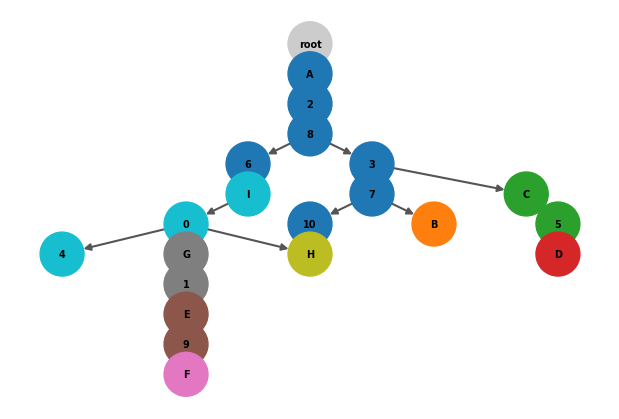

820
[8]


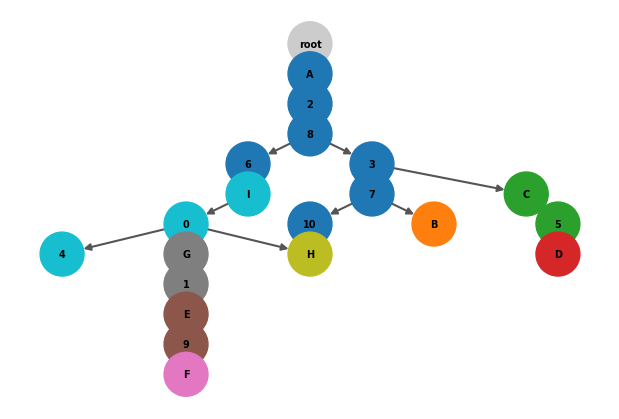

821
[8]


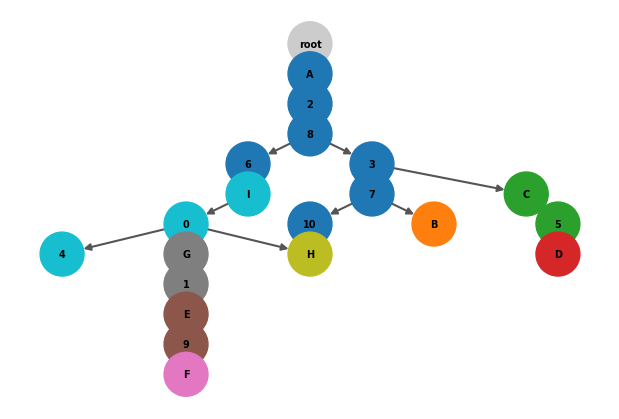

822
[8]


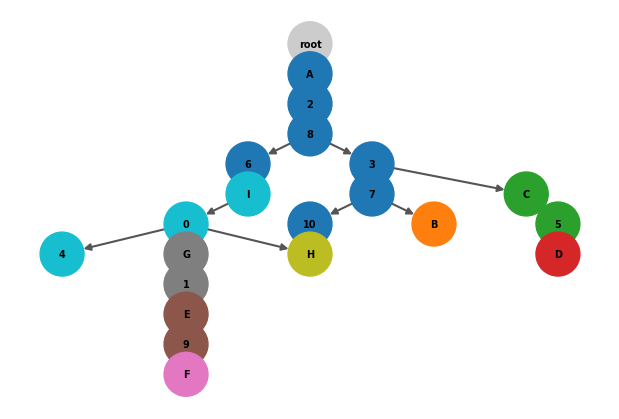

823
[8]


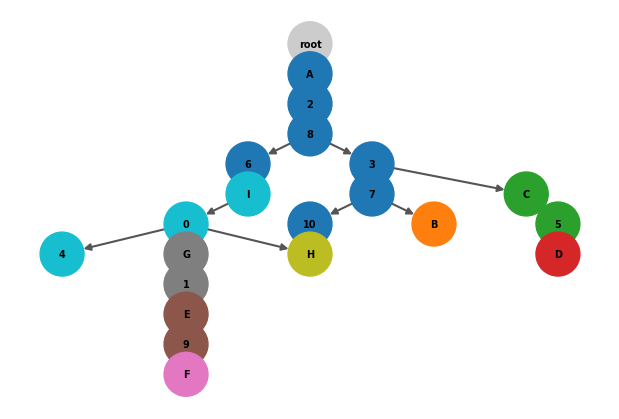

824
[8]


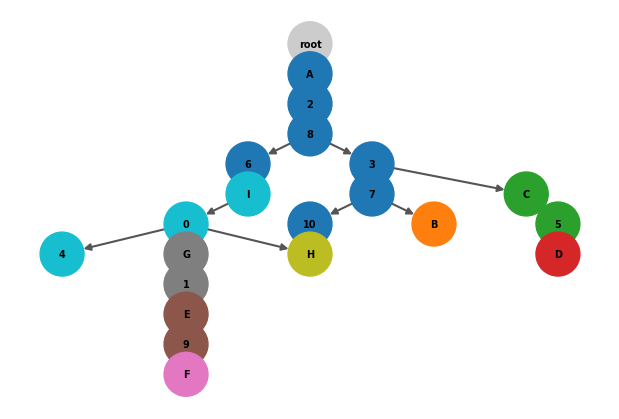

825
[8]


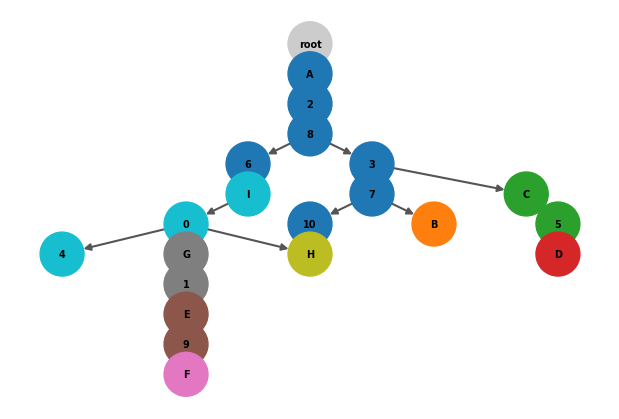

826
[8]


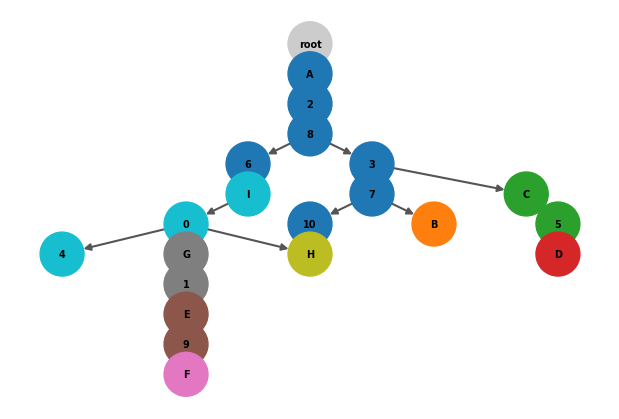

827
[8]


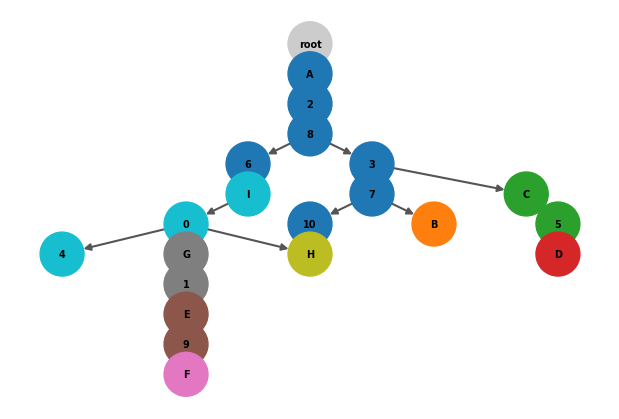

828
[8]


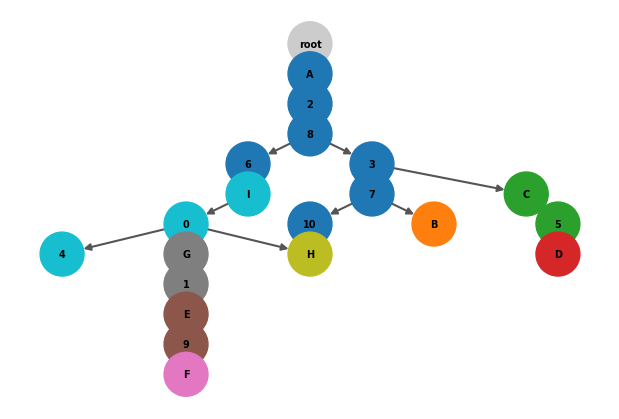

829
['A', 'E']
830
['A', 'E']
831
['A', 'E']
832
['A', 'E']
833
['A', 'E']
834
['A', 'E']
835
['A', 'E']
836
['A', 'E']
837
['A', 'E']
838
['A', 'E']
839
['A', 'E']
840
['A', 'E']
841
['A', 'E']
842
['A', 'E']
843
['A', 'E']
844
['A', 'E']
845
['A', 'E']
846
['A', 'E']
847
['A', 'E']
848
['A', 'E']
849
['A', 'E']
850
['A', 'E']
851
['A', 'E']
852
['A', 'E']
853
['A', 'E']
854
['A', 'E']
855
['A', 'E']
856
['A', 'E']
857
['A', 'E']
858
['A', 'E']
859
['A', 'E']
860
['A', 'E']
861
['A', 'E']
862
['A', 'E']
863
['A', 'E']
864
['A', 'E']
865
['A', 'E']
866
['A', 'E']
867
['A', 'E']
868
['A', 'E']
869
['A', 'E']
870
['A', 'E']
871
[8, 1]
872
[8, 1]
873
[8, 1]
874
[8, 1]
875
[8, 1]
876
[8, 1]
877
[8, 1]
878
[8, 1]
879
[8, 1]
880
[8, 1]
881
[8, 1]
882
[8, 1]
883
[8, 1]
884
[8, 1]
885
[8, 1]
886
[8, 1]
887
[8, 1]
888
[8, 1]
889
[8, 1]
890
[8, 1]
891
[8, 1]
892
[8, 1]
893
[8, 1]
894
[8, 1]
895
[8, 1]
896
[8, 1]
897
[8, 1]
898
[8, 1]
899
[8, 1]
900
[8, 1]
901
[8, 1]
902
[8, 1]
903
[8, 1]
904
[8,

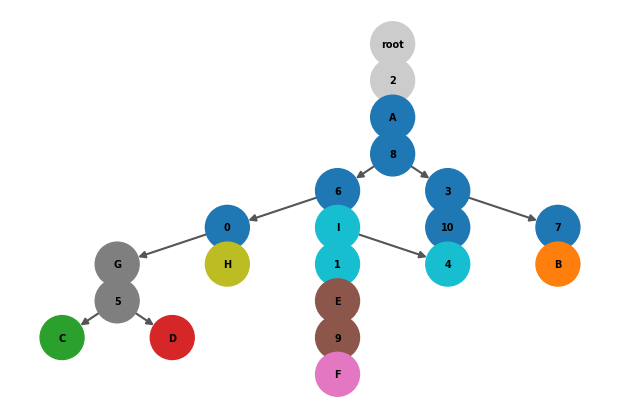

939
['A']


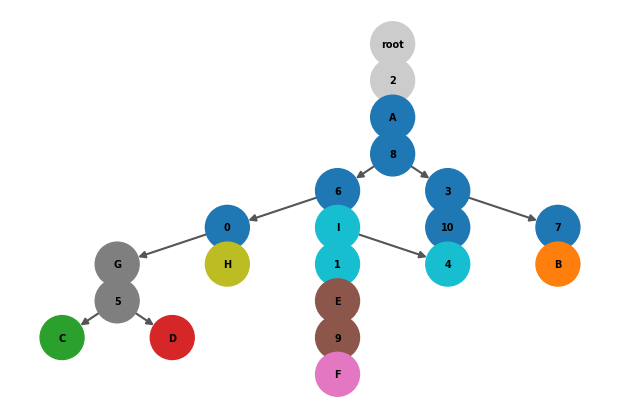

940
['A']


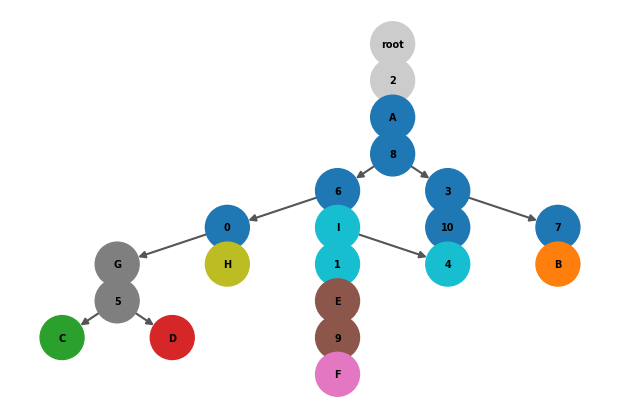

941
['A']


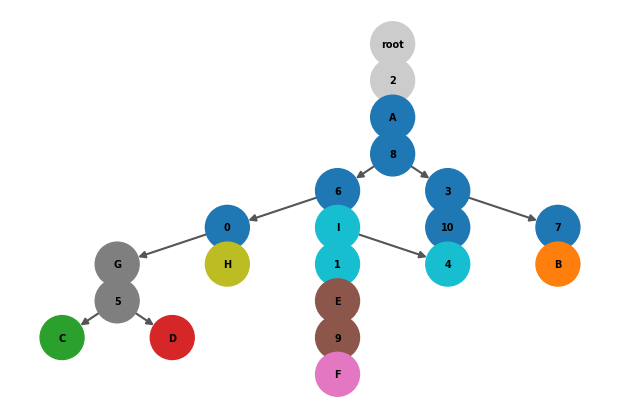

942
['A']


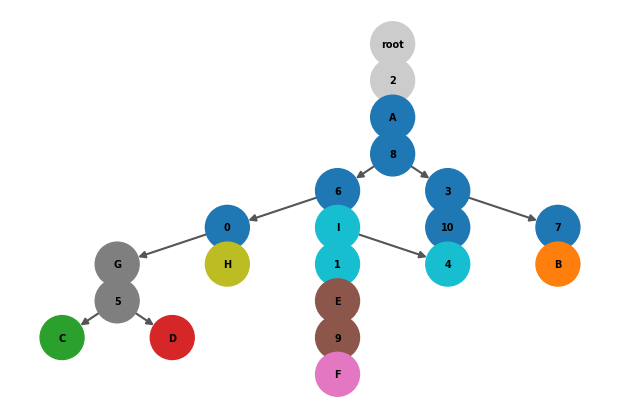

943
['A']


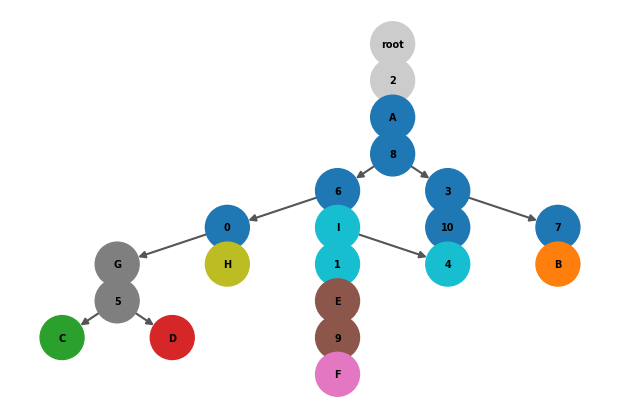

944
['A']


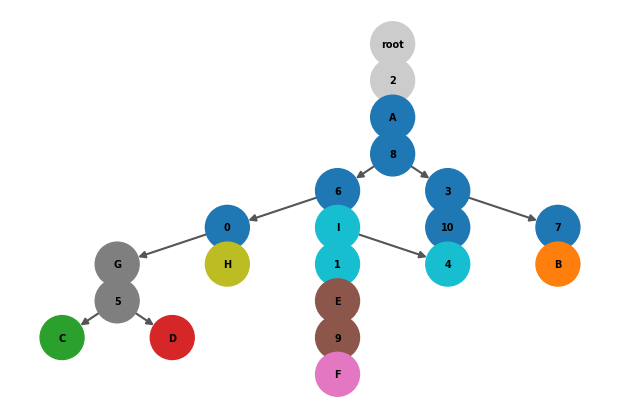

945
['A']


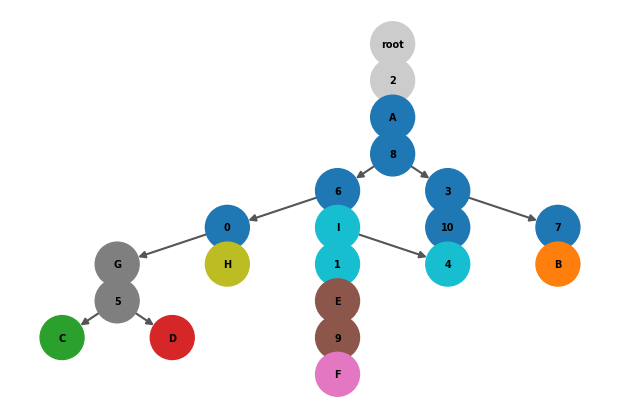

946
['A']


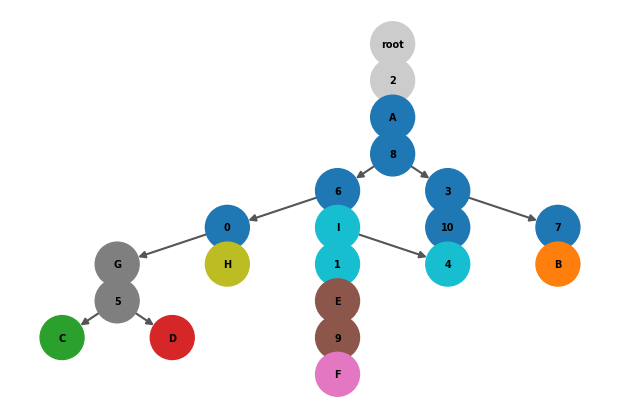

947
['A']


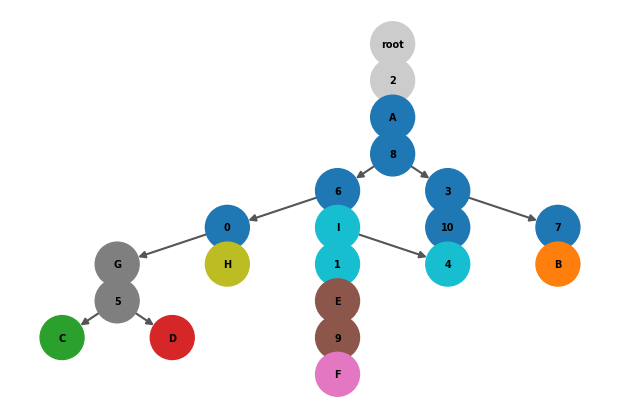

948
['A']


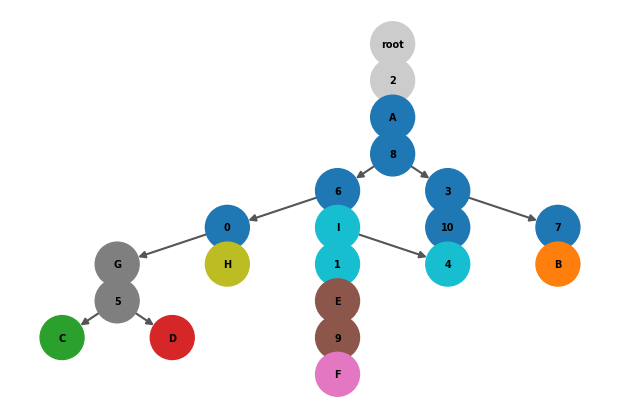

949
['A']


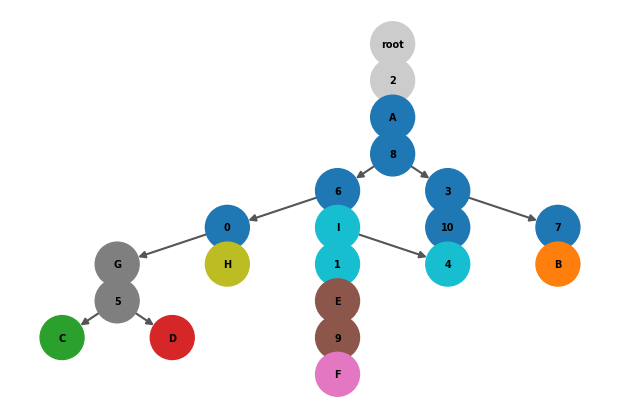

950
['A']


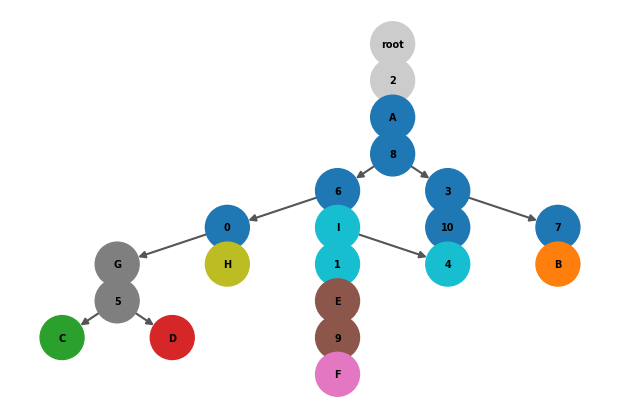

951
['A']


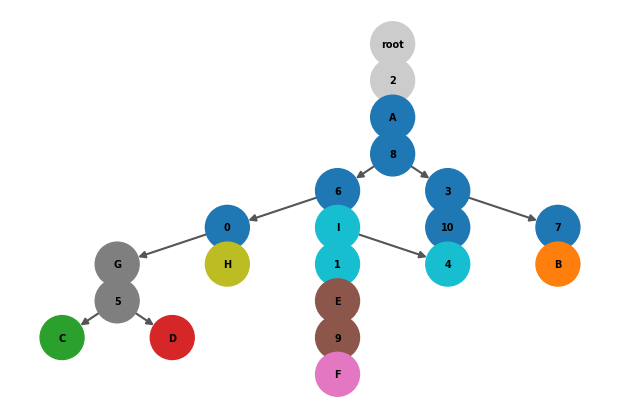

952
['A']


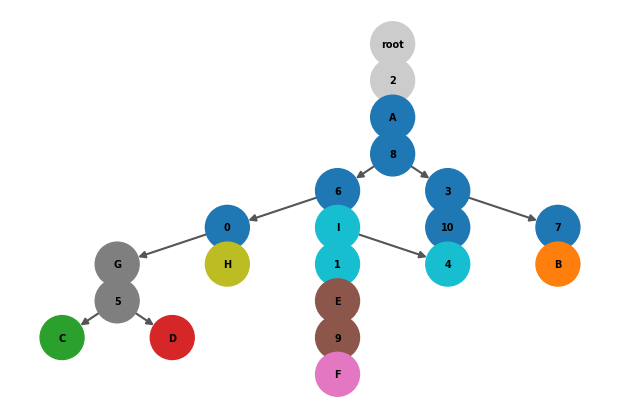

953
['A']


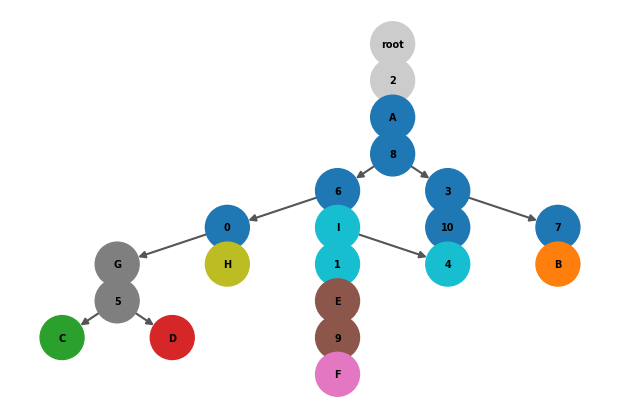

954
['A']


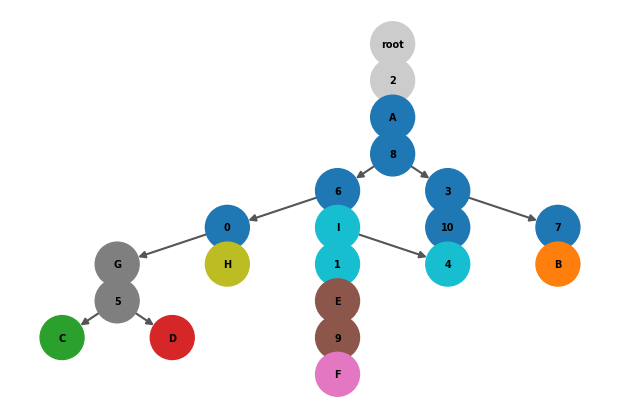

955
['A']


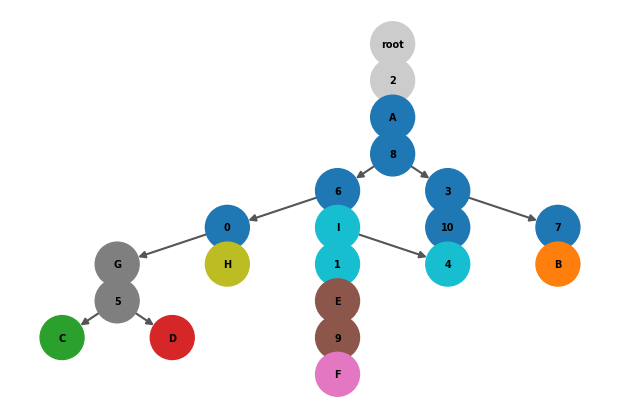

956
['A']


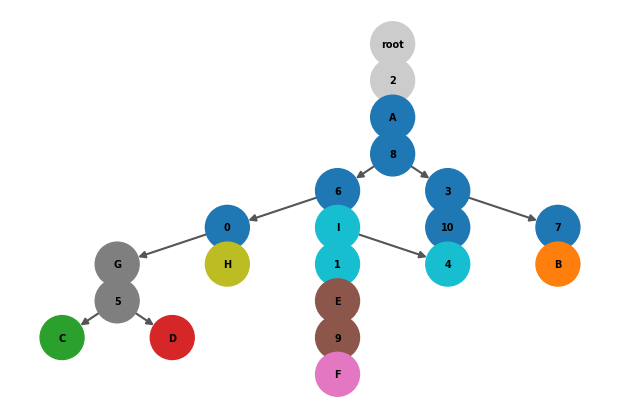

957
7 is being repeated
958
7 is being repeated
959
7 is being repeated
960
7 is being repeated
961
7 is being repeated
962
7 is being repeated
963
7 is being repeated
964
7 is being repeated
965
7 is being repeated
966
7 is being repeated
967
7 is being repeated
968
7 is being repeated
969
7 is being repeated
970
7 is being repeated
971
7 is being repeated
972
7 is being repeated
973
7 is being repeated
974
7 is being repeated
975
7 is being repeated
976
7 is being repeated
977
7 is being repeated
978
7 is being repeated
979
7 is being repeated
980
7 is being repeated
981
7 is being repeated
982
7 is being repeated
983
7 is being repeated
984
7 is being repeated
985
7 is being repeated
986
7 is being repeated
987
[1, 'A']
988
[1, 'A']
989
[1, 'A']
990
[1, 'A']
991
[1, 'A']
992
[1, 'A']
993
[1, 'A']
994
[1, 'A']
995
[1, 'A']
996
[1, 'A']
997
[1, 'A']
998
[1, 'A']
999
[1, 'A']
1000
[1, 'A']
1001
[1, 'A']


In [39]:
for i, solution in enumerate(solutions):
    try:
        print(i)
        X, B, U, F, G = solution
        solT_mut, solT_cell = generate_perfect_phylogeny(B)
        # draw_clone_tree(solT_mut)
        fixed_T = fix_T(B, G, solT_cell)
        children = list(fixed_T.successors(2))
        print(children)
        if i < 5 or len(children) == 1:
            draw_clone_tree(fixed_T)
        if i > 1000:
            break
    except Exception as e:
        print(e)